In [100]:
import torch
import matplotlib.pyplot as plt

In [101]:
def get_file(avg, a, temperature, n_client, n_train_data, n_public_data, n_test_data, seed, local_epochs, distill_epochs, server_epochs, batch_size, alpha, dataset, model_structure):
    if avg:
        save_path = f'./res/fedavg_seed_{seed}_alpha_{alpha}_dataset_{dataset}_model_structure_{model_structure}/'
        file_name = save_path + \
            f'n_client_{n_client}_' + \
            f'n_train_data_{n_train_data}_' + \
            f'n_test_data_{n_test_data}_' + \
            f'local_epochs_{local_epochs}_' + \
            f'server_epochs_{server_epochs}_' + \
            f'batch_size_{batch_size}_' + \
            f'dataset_{dataset}.pt'
    else:
        save_path = f'./res/fedmd_seed{seed}_alpha_{alpha}_dataset_{dataset}_model_structure_{model_structure}/'
        file_name = save_path + \
            f'a_{a}_' + \
            f'temperature_{temperature}_' + \
            f'n_client_{n_client}_' + \
            f'n_train_data_{n_train_data}_' + \
            f'n_public_data_{n_public_data}_' + \
            f'n_test_data_{n_test_data}_' + \
            f'local_epochs_{local_epochs}_' + \
            f'distill_epochs_{distill_epochs}_' + \
            f'batch_size_{batch_size}_' + \
            f'dataset_{dataset}.pt'
    return file_name

In [102]:
file_name = './res/fedmd_seed10000_alpha_0.1_dataset_cifar10_model_structure_cnn2/a_0.5_temperature_1.0_n_client_9_n_train_data_1000_n_public_data_100_n_test_data_200_local_epochs_5_distill_epochs_5_batch_size_160_dataset_cifar10.pt'

In [103]:
a = 1.0
temperature = 10.0
n_client = 9
n_train_data = 1000
n_public_data = 100
n_test_data = 200
seed = 0
local_epochs = 5
distill_epochs = 5
server_epochs = 20
batch_size = 160
alpha = 0.1
dataset = 'cifar10'
model_structure = 'resnet18'

avg = False
# file_name = get_file(avg, a, temperature, n_client, n_train_data, n_public_data, n_test_data, seed, local_epochs, distill_epochs, server_epochs, batch_size, alpha, dataset, model_structure)
data_load = torch.load(file_name, map_location='cpu')
key = list(data_load.keys())
print(key)
plt.style.use('default')

['acc', 'client_models']


In [104]:
# FedAvg
if 'acc_server' in key:
    for i, acc in data_load['acc_server'].items():
        print(acc[-1])
        plt.plot(acc, label=f'client {i}')
    # acc = data_load['acc_server']
    # print(acc[-1])
    # plt.plot(acc, label='FedAvg')
    plt.legend()
    plt.show()

0.7400000095367432
0.8650000095367432
0.9549999833106995
0.9049999713897705
0.7249999642372131
0.8449999690055847
0.8799999952316284
0.8349999785423279
0.6850000023841858


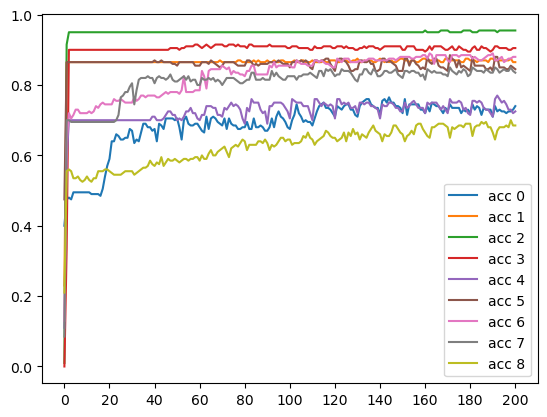

In [105]:
acc__ = []
for i, acc in data_load['acc'].items():
    # for j, acc_ in acc.items():
    plt.plot(acc, label=f'acc {i}')
    print(acc[-1])
plt.xticks(ticks=range(0, len(acc), len(acc) // 10))
plt.legend()
plt.show()